In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2024-11-26 16:56:09.797944: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 16:56:11.740958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732658172.081266  719835 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732658172.222068  719835 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 16:56:13.223199: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [10]:
# Set paths
dataset_url = "https://dl.dropboxusercontent.com/scl/fi/mrsbiu74dh3h3i0j2xi8b/ls_model_data_five.zip?rlkey=in4z2twssi71adfi1exknm67w&dl=0?raw=1"
dataset_path = tf.keras.utils.get_file('ls_model_data_five.zip', origin=dataset_url, extract=True)
extracted_dir = os.path.splitext(dataset_path)[0]



In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load MobileNetV2 with pre-trained ImageNet weights (without the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create the model by adding custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # For binary classification (landslide vs non-landslide)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,570,753 (13.62 MB)

 Trainable params: 1,312,769 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

extracted_dir = '/home/mjp2da/.keras/datasets/ls_model_data_five_extracted'
train_dir = os.path.join(extracted_dir, 'train')
val_dir = os.path.join(extracted_dir, 'validation')
test_dir = os.path.join(extracted_dir, 'test')


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = '/home/mjp2da/.keras/datasets/ls_model_data_five_extracted'
# Create ImageDataGenerators with validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserve 20% for validation
)

# Train generator with validation split
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specifies this is the training subset
)

# Validation generator with validation split
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specifies this is the validation subset
)


Found 5580 images belonging to 5 classes.
Found 1394 images belonging to 5 classes.


In [14]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/home/mjp2da/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 155s 850ms/step - accuracy: 0.9397 - loss: 0.1710 - val_accuracy: 0.5768 - val_loss: 1.5572
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 105s 596ms/step - accuracy: 0.9717 - loss: 0.0823 - val_accuracy: 0.5868 - val_loss: 1.6599
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 103s 585ms/step - accuracy: 0.9853 - loss: 0.0432 - val_accuracy: 0.5473 - val_loss: 1.7242
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 100s 573ms/step - accuracy: 0.9867 - loss: 0.0377 - val_accuracy: 0.5796 - val_loss: 1.6933
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 103s 585ms/step - accuracy: 0.9839 - loss: 0.0409 - val_accuracy: 0.5760 - val_loss: 1.9400
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 103s 590ms/step - accuracy: 0.9845 - loss: 0.0463 - val_accuracy: 0.5617 - val_loss: 2.2040
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 105s 599ms/step - accuracy: 0.9878 - loss: 0.0390 - val_accuracy: 0.5760 - val_loss: 1.9091
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 105s 600ms/step - accuracy: 0.9925 -

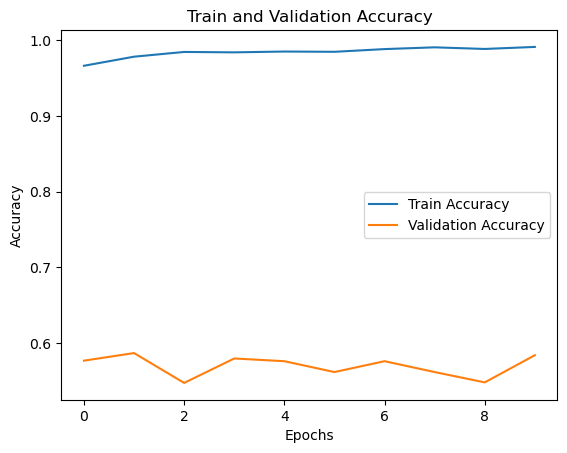

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model_save_path = '/home/mjp2da/.keras/models/mobilenetv2_landslide_model.h5'

# Save the model
model.save(model_save_path)
print(f"Model saved to {model_save_path}.")

Model saved to /home/mjp2da/.keras/models/mobilenetv2_landslide_model.h5.


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

In [23]:
# Download and extract the test dataset
test_dataset_url = "https://dl.dropboxusercontent.com/scl/fi/nyv6xg7u0lj5uv5jtglto/test_google_images_landslide_three.zip?rlkey=b7xnjid2s7zvfjbp0oqtji084&dl=0?raw=1"
test_dataset_path = tf.keras.utils.get_file('test_google_images_landslide_three.zip', origin=test_dataset_url, extract=True)
test_extracted_dir = os.path.splitext(test_dataset_path)[0]

# Check test dataset structure
print(f"Test dataset extracted to: {test_extracted_dir}")

Test dataset extracted to: /home/mjp2da/.keras/datasets/test_google_images_landslide_three_extracted


In [25]:
import os
test_extracted_dir = '/home/mjp2da/.keras/datasets/test_google_images_landslide_three_extracted'
print(os.listdir(test_extracted_dir))

['Google_Earth_Images']


In [26]:
test_dir = os.path.join(test_extracted_dir, 'Google_Earth_Images')

In [27]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # For binary classification, adjust if multi-class
    shuffle=False  # Ensure test data is not shuffled for evaluation
)

Found 114 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import load_model
model = load_model(model_save_path)

print("Model loaded successfully.")

Model loaded successfully.


In [29]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.4053 - loss: 8.1589
Test Loss: 5.4199042320251465
Test Accuracy: 59.65%


In [30]:
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step


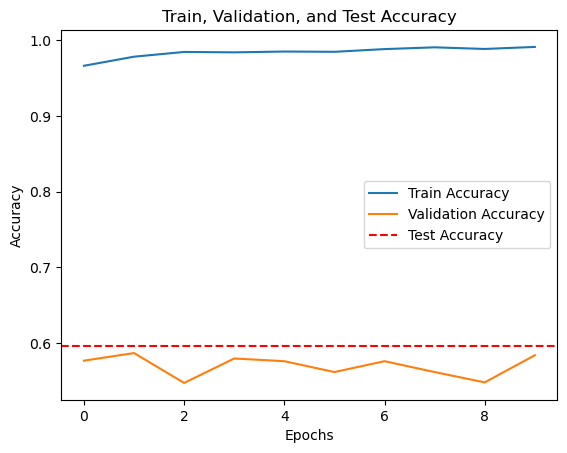

In [31]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Train, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import confusion_matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

Confusion Matrix:
[[ 1 46]
 [ 0 67]]


NameError: name 'classification_report' is not defined

In [ ]:
filenames = test_generator.filenames
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    random_idx = np.random.randint(0, len(filenames))
    img_path = os.path.join(test_dir, filenames[random_idx])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    true_label = "Landslide" if true_classes[random_idx] == 1 else "Non-Landslide"
    pred_label = "Landslide" if predicted_classes[random_idx] == 1 else "Non-Landslide"
    plt.title(f"True: {true_label}\nPred: {pred_label}")

plt.tight_layout()
plt.show()